<h2>ANÁLISE DE COMPONENTES PRINCIPAIS PARA IDENTIFICAÇÃO DE APLs <h2>

<h2>IMPORTAÇÃO DE BBT<h2>

In [45]:
#importação de bbt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>IMPORTAÇÃO DOS DADOS<h2>

In [46]:
#importar dados de microrregiões

datamicro=pd.read_excel(r'C:\Users\joaov\Downloads\MICROREGIAO-EMPREGO2018MOD.xlsx')

# 1--->(Fabricação de Máquinas e Aparelhos de Refrigeração e Ventilação para Uso Industrial e Comercial, Peças e Acessórios)
# 2--->(Fabricação de Aparelhos e Equipamentos de Ar Condicionado para Uso Industrial)
# 3--->(Fabricação de Aparelhos e Equipamentos de Ar Condicionado para Uso Não-Industrial)


datamicro.columns=['Microrregiao','1','2','3']
datamicro

,Microrregiao,1,2,3
0,Porto Velho,0,0,0
1,Ariquemes,0,1,0
2,Ji-Paraná,16,0,0
3,Vilhena,6,0,0
4,Rio Branco,8,0,0
...,...,...,...,...
161,Goiânia,185,0,16
162,Entorno de Brasília,10,0,0
163,Sudoeste de Goiás,7,0,0
164,Meia Ponte,0,0,0


<h2>TRATAMENTO DOS DADOS<h2>

In [47]:
#separar microrregiões do DataFrame parte1

matrixmicro=datamicro['Microrregiao']

matrixmicro

0              Porto Velho
1                Ariquemes
2                Ji-Paraná
3                  Vilhena
4               Rio Branco
              ...         
161                Goiânia
162    Entorno de Brasília
163      Sudoeste de Goiás
164             Meia Ponte
165               Brasília
Name: Microrregiao, Length: 166, dtype: object

In [48]:
#separar microrregiões do DataFrame parte2

datamicro.drop('Microrregiao',1,inplace=True)

datamicro

,1,2,3
0,0,0,0
1,0,1,0
2,16,0,0
3,6,0,0
4,8,0,0
...,...,...,...
161,185,0,16
162,10,0,0
163,7,0,0
164,0,0,0


In [49]:
#Dividir atividades ligadas à ar condicionado em DATA FRAMES

# A1--->(Fabricação de Máquinas e Aparelhos de Refrigeração e Ventilação para Uso Industrial e Comercial, Peças e Acessórios)
# A2--->(Fabricação de Aparelhos e Equipamentos de Ar Condicionado para Uso Industrial)
# A3--->(Fabricação de Aparelhos e Equipamentos de Ar Condicionado para Uso Não-Industrial)

A1=pd.DataFrame(datamicro['1'].values,index=matrixmicro, columns=['1'])
A2=pd.DataFrame(datamicro['2'].values,index=matrixmicro, columns=['2'])
A3=pd.DataFrame(datamicro['3'].values,index=matrixmicro, columns=['3'])

A1

,1
Microrregiao,
Porto Velho,0
Ariquemes,0
Ji-Paraná,16
Vilhena,6
Rio Branco,8
...,...
Goiânia,185
Entorno de Brasília,10
Sudoeste de Goiás,7


In [50]:
#Carregar valores totais

datamicro2=pd.read_excel(r'C:\Users\joaov\Downloads\TOTALEMPREGO2018MUN.xlsx')
datamicro2

,Microrregião,"Abate de Reses, Exceto Suínos","Abate de Suínos, Aves e Outros Pequenos Animais",Fabricação de Produtos de Carne,Preservação do Pescado e Fabricação de Produtos do Pescado,Fabricação de Conservas de Frutas,Fabricação de Conservas de Legumes e Outros Vegetais,"Fabricação de Sucos de Frutas, Hortaliças e Legumes","Fabricação de óleos Vegetais em Bruto, Exceto óleo de Milho","Fabricação de óleos Vegetais Refinados, Exceto óleo de Milho",...,"Manutenção e Reparação de Tanques, Reservatórios Metálicos e Caldeiras, Exceto para Veículos",Manutenção e Reparação de Equipamentos Eletrônicos e ópticos,Manutenção e Reparação de Máquinas e Equipamentos Elétricos,Manutenção e Reparação de Máquinas e Equipamentos da Indústria Mecânica,Manutenção e Reparação de Veículos Ferroviários,Manutenção e Reparação de Aeronaves,Manutenção e Reparação de Embarcações,Manutenção e Reparação de Equipamentos e Produtos não Especificados Anteriormente,Instalação de Máquinas e Equipamentos Industriais,Instalação de Equipamentos não Especificados Anteriormente
0,Porto Velho,396,14,117,2,22,3,33,0,0,...,3,13,38,79,3,0,2,3,41,25
1,Guajará-Mirim,50,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Ariquemes,104,2,3,232,1,4,0,0,0,...,0,0,4,21,0,0,0,0,1,18
3,Ji-Paraná,3659,33,191,0,54,0,0,27,0,...,3,7,16,67,0,0,0,1,6,14
4,Alvorada Doeste,973,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Meia Ponte,194,569,9,0,6,494,2,257,1066,...,1,0,28,132,0,0,5,16,147,22
552,Pires do Rio,39,2833,305,0,0,0,0,145,0,...,0,0,1,33,0,0,0,0,75,2
553,Catalão,36,5,101,3,2,0,0,36,68,...,0,1,45,92,0,0,0,13,13,28
554,Quirinópolis,442,0,195,22,0,0,0,270,0,...,145,0,5,11,0,0,0,0,8,7


In [51]:
#calculo soma por atividade em industria de transformação no Brasil
datamicro2.drop('Microrregião',axis=1).sum()

Abate de Reses, Exceto Suínos                                                        133779
Abate de Suínos, Aves e Outros Pequenos Animais                                      284848
Fabricação de Produtos de Carne                                                       65197
Preservação do Pescado e Fabricação de Produtos do Pescado                            18553
Fabricação de Conservas de Frutas                                                     23461
                                                                                      ...  
Manutenção e Reparação de Aeronaves                                                    6480
Manutenção e Reparação de Embarcações                                                  5484
Manutenção e Reparação de Equipamentos e Produtos não Especificados Anteriormente      7571
Instalação de Máquinas e Equipamentos Industriais                                     26466
Instalação de Equipamentos não Especificados Anteriormente                      

In [52]:
#calculo soma total das atividades em industria de transformação no Brasil
total=datamicro2.drop('Microrregião',axis=1).sum().sum()
total

6741497

In [53]:
#Cálculo de quociente locacional
data2mod=pd.DataFrame(datamicro2.drop('Microrregião',axis=1).values,index=datamicro2['Microrregião'])
data2mod


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
Microrregião,,,,,,,,,,,,,,,,,,,,,
Porto Velho,396,14,117,2,22,3,33,0,0,0,...,3,13,38,79,3,0,2,3,41,25
Guajará-Mirim,50,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Ariquemes,104,2,3,232,1,4,0,0,0,0,...,0,0,4,21,0,0,0,0,1,18
Ji-Paraná,3659,33,191,0,54,0,0,27,0,0,...,3,7,16,67,0,0,0,1,6,14
Alvorada Doeste,973,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Meia Ponte,194,569,9,0,6,494,2,257,1066,142,...,1,0,28,132,0,0,5,16,147,22
Pires do Rio,39,2833,305,0,0,0,0,145,0,0,...,0,0,1,33,0,0,0,0,75,2
Catalão,36,5,101,3,2,0,0,36,68,0,...,0,1,45,92,0,0,0,13,13,28


In [54]:
#calculo soma total das atividades em industria de transformação por microrregião
matriz=data2mod.T.sum()
matriz  #Serie

Microrregião
Porto Velho         5979
Guajará-Mirim        294
Ariquemes           3066
Ji-Paraná           9647
Alvorada Doeste     1233
                   ...  
Meia Ponte         16170
Pires do Rio        4806
Catalão             8745
Quirinópolis        7857
Brasília           25972
Length: 556, dtype: int64

<h2>CÁLCULO QL<h2>

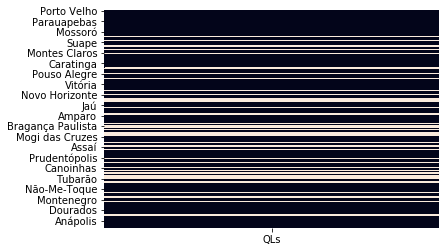

In [55]:
#total =================>calculo soma total das atividades em industria de transformação no Brasil
#A1.sum()===============>soma da atividade industrial 1 no brasil
#matriz[micro]  ===============>emprego industrial (transformação) total na micorregião 
#

dataquoc=pd.DataFrame()
for micro in matrixmicro:
    quociente=((A1.loc[micro]/matriz[micro])/(A1.sum()/total))
    dataquoc[micro]=quociente

dataquoc=dataquoc.T
dataquoc.columns=['QLs']

sns.heatmap(dataquoc>1,cbar=False) #Tentar visualizar se existem Microrregioes com QL>1 --> existem

In [56]:

#dataquoc=dataquoc[dataquoc['QLs']>1]
dataquoc.T
#QLS >1:
backupquoc=dataquoc
dataquoc.T

,Porto Velho,Ariquemes,Ji-Paraná,Vilhena,Rio Branco,Manaus,Belém,Castanhal,Parauapebas,Redenção,...,Cuiabá,Primavera do Leste,Rondonópolis,Rio Vermelho,Anápolis,Goiânia,Entorno de Brasília,Sudoeste de Goiás,Meia Ponte,Brasília
QLs,0.0,0.0,0.559474,0.312244,0.672638,0.29068,0.288047,0.159023,0.34896,0.0,...,1.181873,0.341655,0.087991,0.18383,0.135891,0.800278,0.336554,0.102247,0.0,0.792276


<h2>CÁLCULO PR<h2>

In [57]:
#PARTICIPAÇÃO RELATIVA
#PR

#total =================>calculo soma total das atividades em industria de transformação no Brasil
#A1.sum()===============>soma da atividade industrial 1 no brasil


dataPR=pd.DataFrame()
for micro in matrixmicro:
    PR=A1.loc[micro]/total
    dataPR[micro]=PR

dataPR=dataPR*100    #PORCENTAGEM

dataPR.index=['PR']
dataPR=dataPR.T
dataPR
backupPR=dataPR


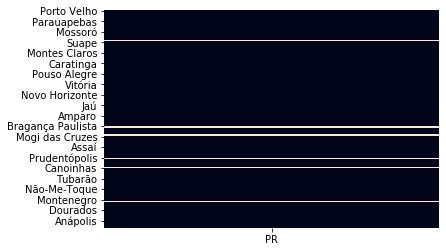

In [58]:
sns.heatmap(dataPR>0.01,cbar=False)

In [59]:
#fazer backup para uso futuro
#dataPR=dataPR[dataPR['PR']>0.01]
dataPR.T
#PR's>1:

,Porto Velho,Ariquemes,Ji-Paraná,Vilhena,Rio Branco,Manaus,Belém,Castanhal,Parauapebas,Redenção,...,Cuiabá,Primavera do Leste,Rondonópolis,Rio Vermelho,Anápolis,Goiânia,Entorno de Brasília,Sudoeste de Goiás,Meia Ponte,Brasília
PR,0.0,0.0,0.000237,0.000089,0.000119,0.001113,0.000341,0.000059,0.000045,0.0,...,0.000994,0.000045,0.000045,0.000015,0.000223,0.002744,0.000148,0.000104,0.0,0.000905


<h2>Cálculo Hirschman-Herfindahl modificado <h2>

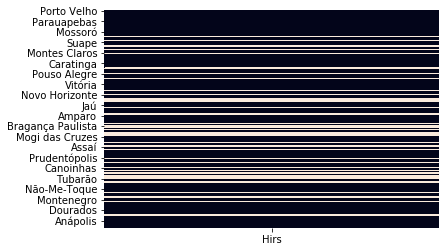

In [60]:
dataHirs=pd.DataFrame()

for micro in matrixmicro:
    hirs=(A1.loc[micro]/matriz[micro])-(A1.sum()/total)
    dataHirs[micro]=hirs

dataHirs=dataHirs.T
dataHirs.columns=['Hirs']
sns.heatmap(dataHirs>0,cbar=False)


#Tentar visualizar se existem Microrregioes com Hirschman-Herfindahl >0  --> existem

In [61]:
#dataHirs=dataHirs[dataHirs['Hirs']>0]
dataHirs.T
backupHirs=dataHirs

<h1>PCA ---ANÁLISE DE COMPONENTES PRINCIPAIS--- PARA ATIVIDADE 1:Fabricação de Máquinas e Aparelhos de Refrigeração e Ventilação para Uso Industrial e Comercial, Peças e Acessórios<h1>

<h3> AJUSTANDO DADOS DE BACKUP EM DATAFRAME(VALORES DE QL,PR,HIRS) <h3>
   

In [62]:
#dataquoc
#dataPR
#dataHirs

dataraiz=backupHirs.join(backupquoc)

lista0=[]
for mun in dataraiz.index:
        valor=backupPR.loc[mun]
        lista0.append(valor[0])

dataraiz['PR']=lista0
dataraiz

,Hirs,QLs,PR
Porto Velho,-0.002964,0.000000,0.000000
Ariquemes,-0.002964,0.000000,0.000000
Ji-Paraná,-0.001306,0.559474,0.000237
Vilhena,-0.002039,0.312244,0.000089
Rio Branco,-0.000970,0.672638,0.000119
...,...,...,...
Goiânia,-0.000592,0.800278,0.002744
Entorno de Brasília,-0.001967,0.336554,0.000148
Sudoeste de Goiás,-0.002661,0.102247,0.000104
Meia Ponte,-0.002964,0.000000,0.000000


<h3>NORMALIZANDO DADOS PARA PCA ('NÃO UTILIZADO NO ARTIGO BASE') <h3>

In [63]:
#from sklearn.preprocessing import StandardScaler
#model=StandardScaler()
#model.fit(dataraiz)
#datanorma=pd.DataFrame(model.transform(dataraiz),columns=dataraiz.columns,index=dataraiz.index)
datanorma=dataraiz

<h3>Aplicando PCA<h3>

In [64]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
datapca=pd.DataFrame(pca.fit_transform(datanorma), columns='componente1 componente2 componente3'.split(),index=datanorma.index)
datapca

,componente1,componente2,componente3
Porto Velho,-0.909276,-0.000595,7.362281e-18
Ariquemes,-0.909276,-0.000595,1.797238e-19
Ji-Paraná,-0.349800,-0.001090,-1.014086e-19
Vilhena,-0.597030,-0.000915,-2.720599e-19
Rio Branco,-0.236636,-0.001357,-1.341794e-19
...,...,...,...
Goiânia,-0.108992,0.001101,-1.055223e-19
Entorno de Brasília,-0.572721,-0.000887,-1.919795e-19
Sudoeste de Goiás,-0.807028,-0.000625,2.626324e-19
Meia Ponte,-0.909276,-0.000595,1.797238e-19


<h3>PLOTAR DISPERSÃO DE DADOS PROJETADOS NOS NOVOS COMPONENTES<h3>

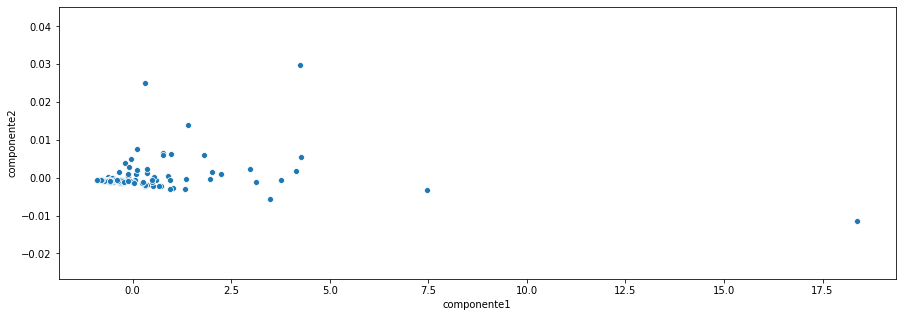

In [65]:
fig,ax=plt.subplots(figsize=(15,5))
ax=sns.scatterplot('componente1','componente2',data=datapca)

<h3>PESOS DAS VARIÁVEIS<h3>

In [66]:
autovetores=np.abs(pca.components_)
autovalores=pca.explained_variance_

unit1=autovetores[0]/(autovetores[0].sum())
unit2=autovetores[1]/(autovetores[1].sum())
unit3=autovetores[2]/(autovetores[2].sum())

cp1=unit1*pca.explained_variance_ratio_[0]
cp2=unit2*pca.explained_variance_ratio_[1]
cp3=unit3*pca.explained_variance_ratio_[2]

datapesos=pd.DataFrame()
datapesos['CP1']=cp1
datapesos['CP2']=cp2
datapesos['CP3']=cp3
datapesos.index=datanorma.columns



#DATA CONTEM VETORES UNITARIOS*VARIANCIA EXPLICADA
datapesos=datapesos.T
datapesos.round(4)

,Hirs,QLs,PR
CP1,0.003,0.9957,0.0013
CP2,0.000,0.0000,0.0000
CP3,0.000,0.0000,0.0000


In [67]:
#PESOS DAS VARIAVIES
PESOS=datapesos.sum()
PESOS

Hirs    0.002952
QLs     0.995740
PR      0.001308
dtype: float64

In [68]:
#REPAR QUE A SOMA DOS PESOS DAS VARIÁVEIS==1  
PESOS.sum().sum()

1.0

<h3>LOADING MATRIX / MATRIZ DE CORRELAÇÃO ENTRE COMPONENTES E VARIÁVEIS<h3>

In [69]:
#CORRELAÇÕES
corr=pd.DataFrame(autovetores,index=datapesos.index,columns=datapesos.columns)
corr=corr.T
corr['CP1']=corr['CP1']*np.sqrt(autovalores[0])
corr['CP2']=corr['CP2']*np.sqrt(autovalores[1])
corr['CP3']=corr['CP3']*np.sqrt(autovalores[2])
corr=corr.T


var=datanorma.cov().iloc[0,0]
corr=corr/(np.sqrt(var))
corr.round(10)

,Hirs,QLs,PR
CP1,1.000000,337.327846,0.441816
CP2,0.000003,0.000884,0.674767
CP3,0.000000,0.000000,0.000000


In [70]:
pd.DataFrame(autovetores,index=datapesos.index,columns=datapesos.columns).round(3)

,Hirs,QLs,PR
CP1,0.006,1.873,0.002
CP2,0.000,0.000,0.004
CP3,0.000,0.000,0.000


In [71]:
dataraiz['ICn']=dataraiz['Hirs']*PESOS[0]+dataraiz['QLs']*PESOS[1]+dataraiz['PR']*PESOS[2]
dataraiz

,Hirs,QLs,PR,ICn
Porto Velho,-0.002964,0.000000,0.000000,-0.000009
Ariquemes,-0.002964,0.000000,0.000000,-0.000009
Ji-Paraná,-0.001306,0.559474,0.000237,0.557087
Vilhena,-0.002039,0.312244,0.000089,0.310908
Rio Branco,-0.000970,0.672638,0.000119,0.669770
...,...,...,...,...
Goiânia,-0.000592,0.800278,0.002744,0.796870
Entorno de Brasília,-0.001967,0.336554,0.000148,0.335114
Sudoeste de Goiás,-0.002661,0.102247,0.000104,0.101804
Meia Ponte,-0.002964,0.000000,0.000000,-0.000009


<h1>PRINCIPAIS MICRORREGIÕES NA ATIVIDADE Fabricação de Máquinas e Aparelhos de Refrigeração e Ventilação para Uso Industrial e Comercial, Peças e Acessórios<h1>

In [72]:
dataraiz.sort_values(by='ICn')

,Hirs,QLs,PR,ICn
Porto Velho,-0.002964,0.000000,0.000000,-0.000009
Guaratinguetá,-0.002964,0.000000,0.000000,-0.000009
Meia Ponte,-0.002964,0.000000,0.000000,-0.000009
Presidente Prudente,-0.002964,0.000000,0.000000,-0.000009
Amparo,-0.002964,0.000000,0.000000,-0.000009
...,...,...,...,...
Londrina,0.011989,5.044108,0.009063,5.022668
Curitiba,0.012342,5.163445,0.037084,5.141533
Recife,0.012368,5.171926,0.012846,5.149947
Santa Cruz do Sul,0.021849,8.370195,0.008277,8.334613


<h1>PLOT DE DISPERSÃO DAS MICRORREGIÕES<h1>

In [73]:
import plotly.express as px
fig = px.scatter(datapca, x="componente1", y="componente2", text=datapca.index, log_x=False, size_max=60)

fig.update_traces(textposition='top center')

fig.update_layout(title_text='Atividade:Fabricação de Máquinas e Aparelhos de Refrigeração e Ventilação para Uso Industrial e Comercial')

fig.show()

#ATENÇÃO===========================>dê zoom

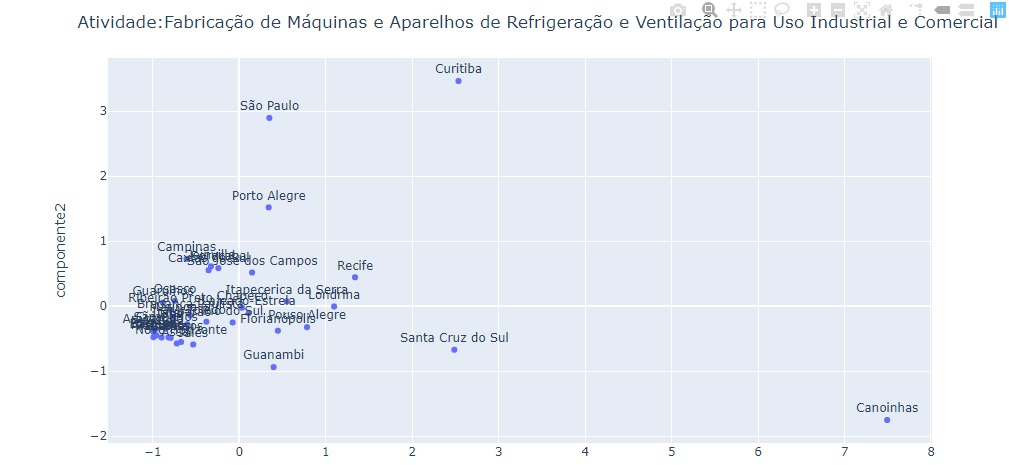

In [74]:
from IPython.display import Image
Image(r'C:\Users\joaov\OneDrive\Documentos\Material Estatística\Principal Componente Análise\PCA-PARA-APL\plotly.jpg')

<h1>*INFORMAÇÕES SOBRE PCA*<h1>
<h2>consulte slides em pdf no repositório<h2>